# JASON RODRIGUES

### THE SPARKS FOUNDATION <br>
#### Data Science and Business Analytics

TASK #02 :Prediction using Unsupervised ML (*Predict the optimum number of clusters from the given iris dataset and represent it visually*)

In [11]:
#importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the given data

In [12]:
iris_data = pd.read_csv("D:\IMP DATA\Desktop\GRIP\Iris.csv")

In [9]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris_data.drop('Id',axis=1,inplace=True)

In [14]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Analysing the given data

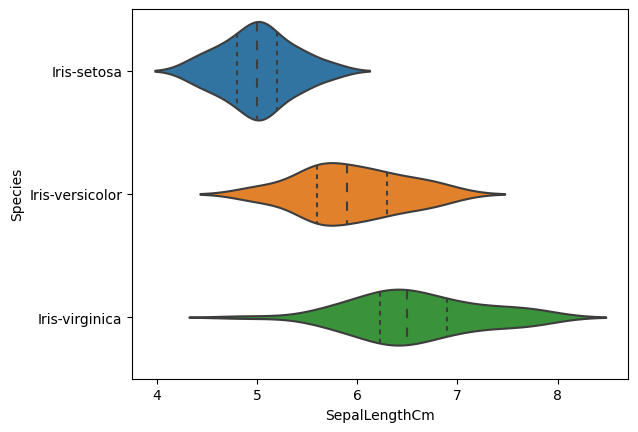

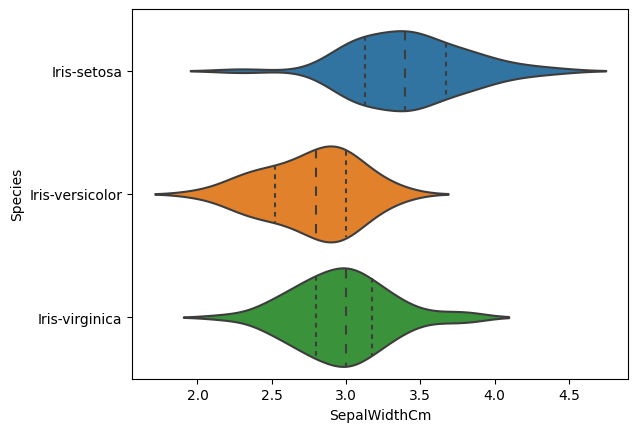

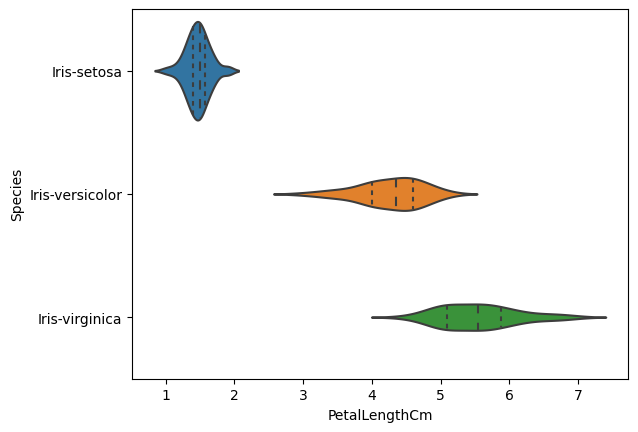

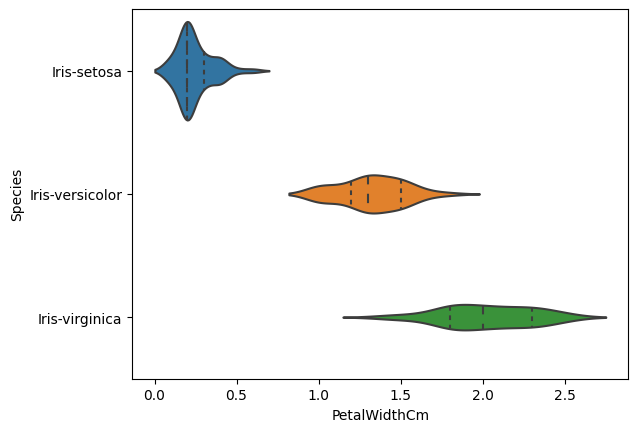

In [15]:
sepal_len = sns.violinplot(y='Species',x='SepalLengthCm',data = iris_data,inner='quartile')
plt.show()
sepal_len = sns.violinplot(y='Species',x='SepalWidthCm',data = iris_data,inner='quartile')
plt.show()
sepal_len = sns.violinplot(y='Species',x='PetalLengthCm',data = iris_data,inner='quartile')
plt.show()
sepal_len = sns.violinplot(y='Species',x='PetalWidthCm',data = iris_data,inner='quartile')
plt.show()

### Plot of Sepal Width v/s Sepal Length

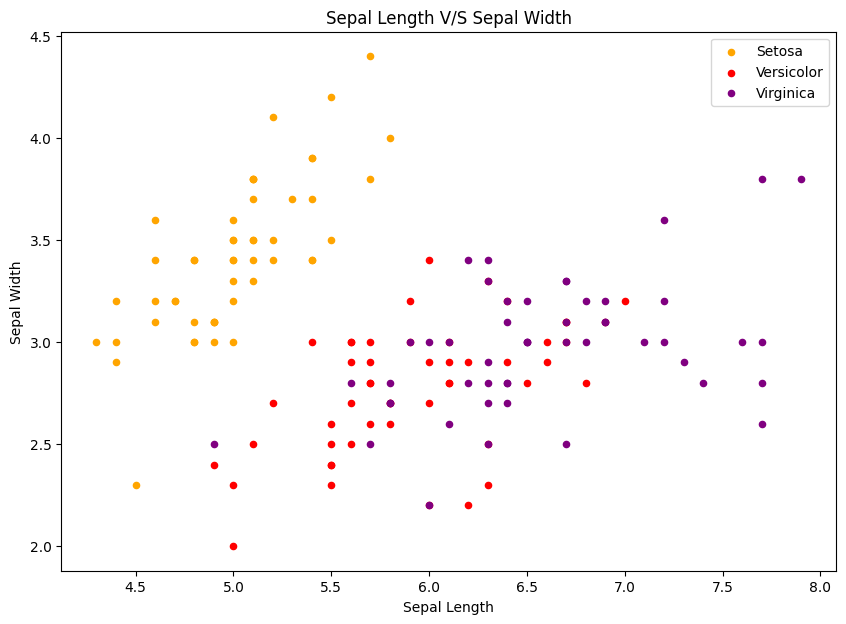

In [16]:
fig = iris_data[iris_data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange',label="Setosa")
iris_data[iris_data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red',label="Versicolor",ax=fig)
iris_data[iris_data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='purple',label="Virginica",ax=fig)
fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length V/S Sepal Width')
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

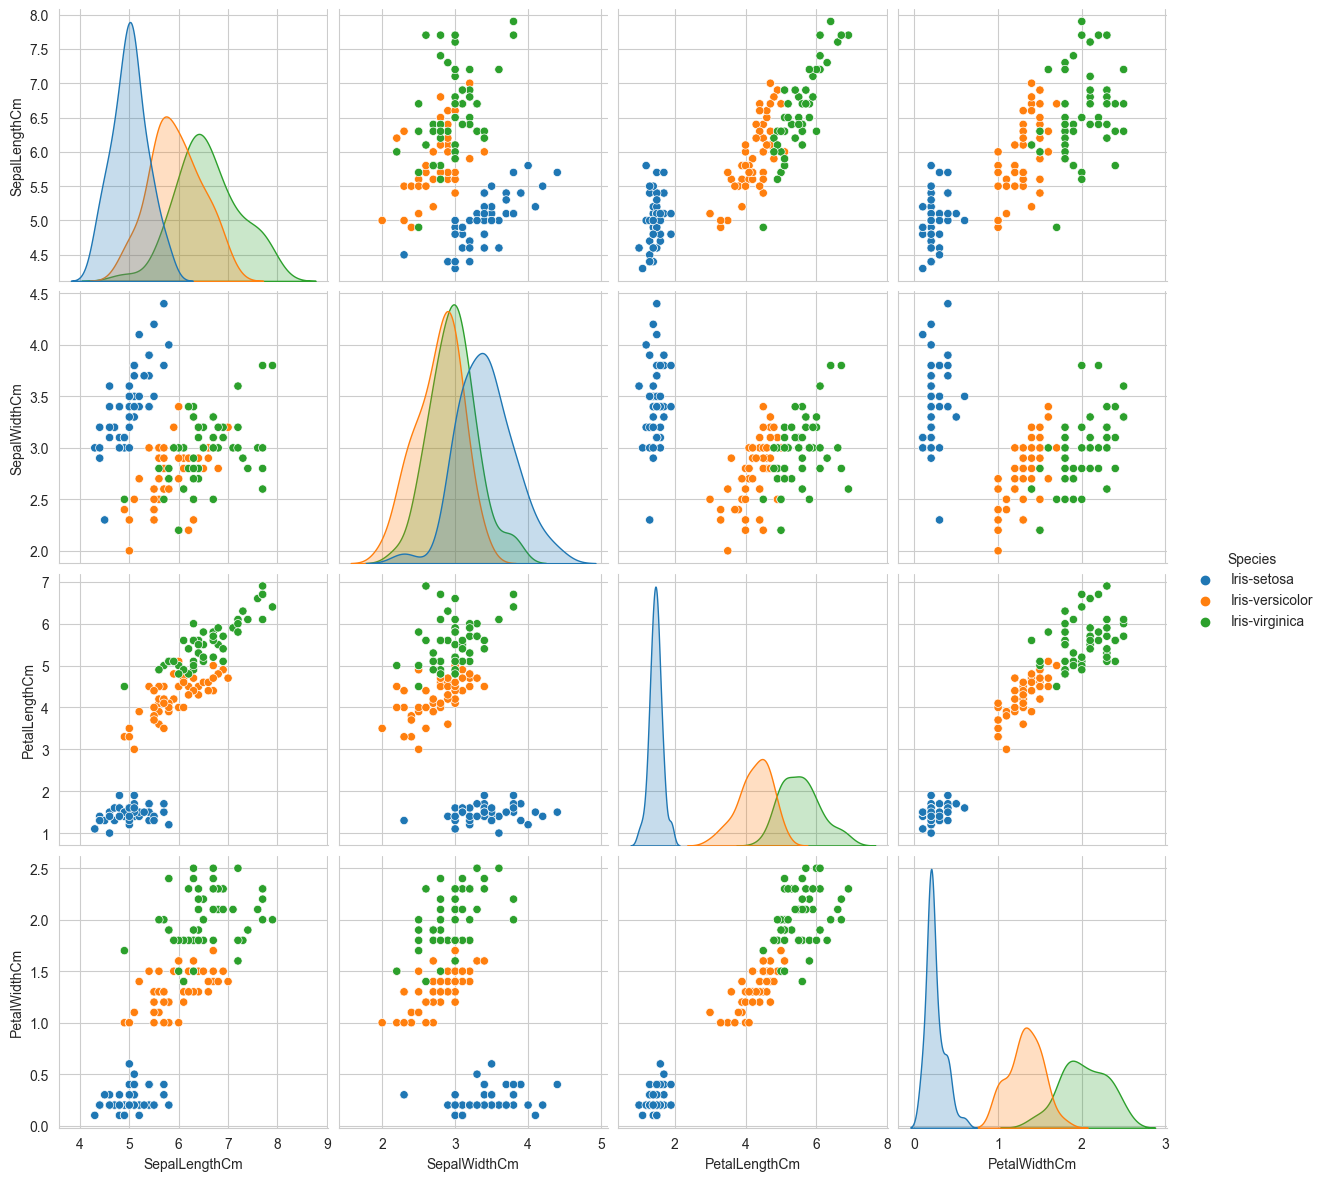

In [17]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris_data,hue='Species',height=3)
plt.show()

### K-Means Clustering 

In [19]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df_new = pd.DataFrame({'x':iris_data['PetalLengthCm'],'y':iris_data['PetalWidthCm']})
df_new.head()

,x,y
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [21]:
iris_data.loc[iris_data['Species']=='Iris-setosa','cluster']= '0'
iris_data.loc[iris_data['Species']=='Iris-versicolor','cluster']= '1'
iris_data.loc[iris_data['Species']=='Iris-virginica','cluster']= '2'
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


#### Creating new dataframe with values of petalWidth and petalLength 

In [22]:
df_new['cluster']=iris_data['cluster']
df_new

,x,y,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


### Now,we apply the K-Means algorithm

In [23]:
from sklearn.cluster import KMeans
KMean = KMeans(n_clusters=3)
KMean.fit(df_new)

KMeans(n_clusters=3)

In [24]:
KMean.cluster_centers_

array([[5.57346939, 2.03265306, 2.        ],
       [1.464     , 0.244     , 0.        ],
       [4.26470588, 1.33333333, 1.01960784]])

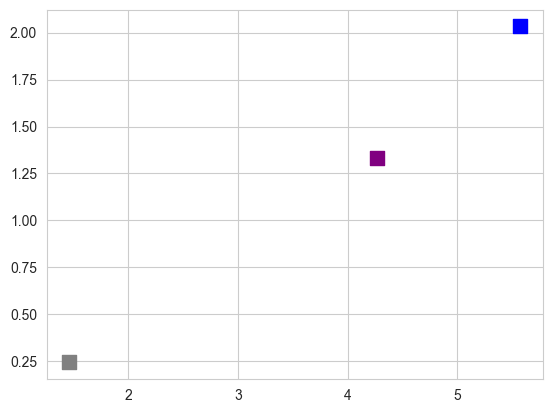

In [53]:
plt.scatter(1.464 , 0.244 ,s=100,c='grey',marker='s')
plt.scatter(4.26470588, 1.33333333,s=100,c='purple',marker='s')
plt.scatter(5.57346939, 2.03265306 ,s=100,c='blue',marker='s')
plt.show()

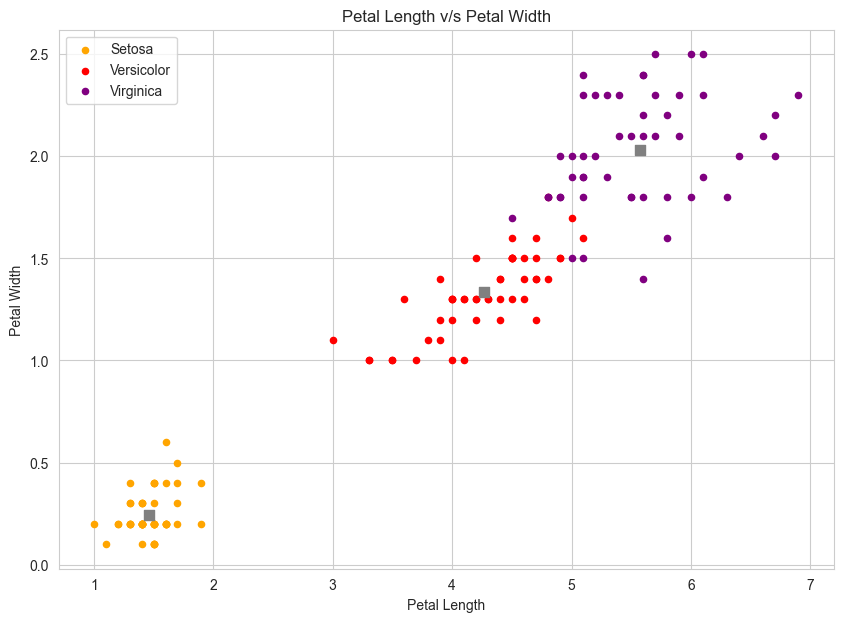

In [25]:
fig = iris_data[iris_data.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange',label="Setosa")
iris_data[iris_data.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red',label="Versicolor",ax=fig)
iris_data[iris_data.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='purple',label="Virginica",ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length v/s Petal Width')
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.scatter(1.464     , 0.244 ,s=50,c='grey',marker='s')
plt.scatter(4.26470588, 1.33333333,s=50,c='grey',marker='s')
plt.scatter(5.57346939, 2.03265306 ,s=50,c='grey',marker='s')
plt.show()

### End 